<a href="https://colab.research.google.com/github/srihitha-05/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

# Make printing easier to read
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.precision', 4)


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
# Load data (adjust path if needed)
path = "DMV_Written_Tests.csv"
df = pd.read_csv(path)

print("Shape:", df.shape)
print(df.dtypes)
df.head()

Shape: (100, 3)
DMV_Test_1    float64
DMV_Test_2    float64
Results         int64
dtype: object


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

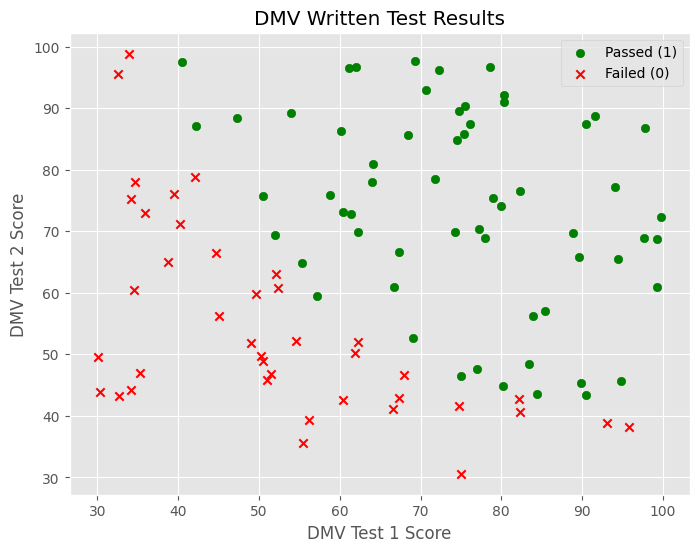

In [5]:

plt.figure(figsize=(8,6))

# Class 1 (passed)
passed = df[df["Results"] == 1]
plt.scatter(passed["DMV_Test_1"], passed["DMV_Test_2"],
            c='g', marker='o', label="Passed (1)")

# Class 0 (failed)
failed = df[df["Results"] == 0]
plt.scatter(failed["DMV_Test_1"], failed["DMV_Test_2"],
            c='r', marker='x', label="Failed (0)")

plt.xlabel("DMV Test 1 Score")
plt.ylabel("DMV Test 2 Score")
plt.title("DMV Written Test Results")
plt.legend()
plt.grid(True)
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [10]:

def sigmoid(z):
    # clip values to avoid overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [17]:

def predict_proba(W, b, X):
    return sigmoid(X @ W + b)

def log_loss(p, y):
    eps = 1e-12
    p = np.clip(p, eps, 1-eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def gradients(W, b, X, y):
    p = predict_proba(W, b, X)
    diff = (p - y)        # shape (n,)
    dW = (X.T @ diff) / X.shape[0]
    db = np.mean(diff)
    return dW, db


### Task 6: Cost and Gradient at Initialization
---

In [18]:
rng = np.random.default_rng(0)
W = rng.normal(0, 0.01, size=2)
b = 0.0
lr = 0.5
epochs = 80
# Extract X and y from dataframe
X = df[["DMV_Test_1", "DMV_Test_2"]].values  # shape (m,2)
y = df["Results"].values                     # shape (m,)

print('Initial W:', W)
print('Initial b:', b)

p = sigmoid(np.dot(X, W) + b)

initial_cost = log_loss(p, y)

initial_dw, initial_db = gradients(W, b, X, y)

print("Initial Cost:", initial_cost)
print("Initial Gradient dw:", initial_dw)
print("Initial Gradient db:", initial_db)

Initial W: [ 0.0013 -0.0013]
Initial b: 0.0
Initial Cost: 0.6930819309342516
Initial Gradient dw: [-11.9698 -11.4603]
Initial Gradient db: -0.10123657892237091


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [22]:
def gradient_descent(W, b, X, y, alpha, num_iters):
    cost_history = []

    for i in range(num_iters):
        dw, db = gradients(W, b, X, y)

        # Update parameters
        W -= alpha * dw
        b -= alpha * db

        # Compute predictions and cost
        p = sigmoid(np.dot(X, W) + b)
        cost = log_loss(p, y)
        cost_history.append(cost)

    return W, b, cost_history

In [28]:
# Initialize parameters
W = np.zeros(X.shape[1])
b = 0
alpha = 0.001   # instead of 0.1
num_iters = 1000


W_opt, b_opt, cost_history = gradient_descent(W, b, X, y, alpha, num_iters)


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

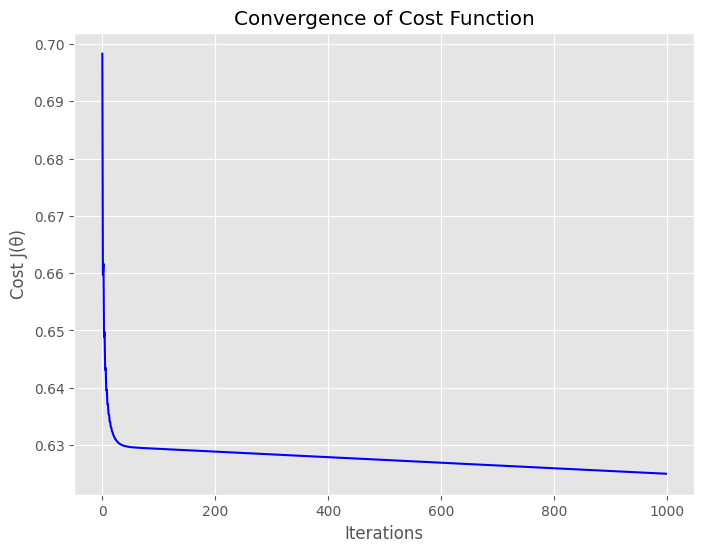

In [29]:
import matplotlib.pyplot as plt

# Task 8: Plot convergence
plt.figure(figsize=(8,6))
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function")
plt.grid(True)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

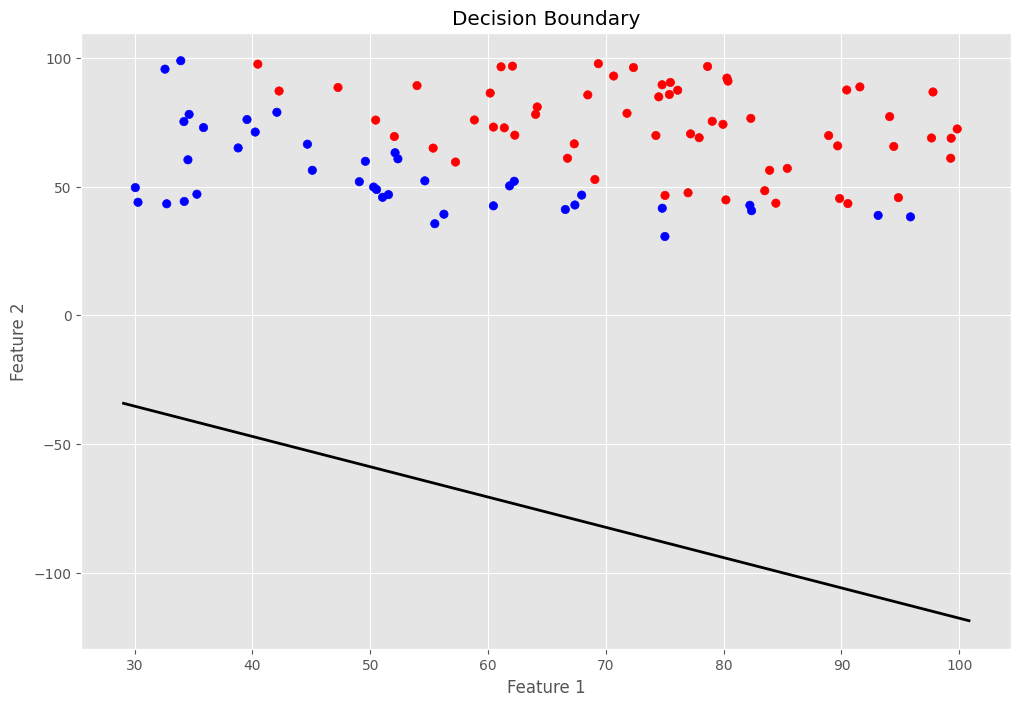

In [33]:
import numpy as np

# Equation: w1*x1 + w2*x2 + b = 0 -> x2 = -(w1/w2)*x1 - (b/w2)
x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
x2_vals = -(W[0]/W[1])*x1_vals - (b/W[1])

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.plot(x1_vals, x2_vals, color="black", linewidth=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
import numpy as np

def predict(X, theta):
    # X : m x n (with bias term included)
    # theta : n x 1
    probs = 1 / (1 + np.exp(-(X @ theta)))  # sigmoid
    return (probs >= 0.5).astype(int)       # threshold at 0.5


In [ ]:
# Suppose X is your dataset with bias column added
# theta is optimized parameters

y_pred = predict(X, theta)


In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

print("Training Accuracy:", accuracy(y, y_pred), "%")
